<a href="https://colab.research.google.com/github/amirNoori73/01-Deep-Learning-Course/blob/main/03-%20mnist_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


8


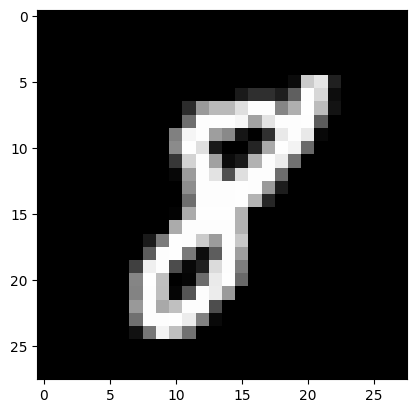

In [27]:
index = 17
x = train_images[index]
print(train_labels[index])

plt.gray()
plt.imshow(x)

In [28]:
np.min(train_images), np.max(train_images)

(np.uint8(0), np.uint8(255))

In [29]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
# model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
hist = model.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/1000
469/469 - 4s - 8ms/step - accuracy: 0.9105 - loss: 0.3193 - val_accuracy: 0.9547 - val_loss: 0.1546
Epoch 2/1000
469/469 - 5s - 11ms/step - accuracy: 0.9617 - loss: 0.1286 - val_accuracy: 0.9649 - val_loss: 0.1117
Epoch 3/1000
469/469 - 3s - 7ms/step - accuracy: 0.9730 - loss: 0.0888 - val_accuracy: 0.9717 - val_loss: 0.0927
Epoch 4/1000
469/469 - 3s - 6ms/step - accuracy: 0.9788 - loss: 0.0683 - val_accuracy: 0.9745 - val_loss: 0.0852
Epoch 5/1000
469/469 - 5s - 11ms/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 0.9764 - val_loss: 0.0715
Epoch 6/1000
469/469 - 3s - 6ms/step - accuracy: 0.9869 - loss: 0.0403 - val_accuracy: 0.9772 - val_loss: 0.0755
Epoch 7/1000
469/469 - 5s - 11ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9766 - val_loss: 0.0755
Epoch 8/1000
469/469 - 3s - 6ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9796 - val_loss: 0.0711
Epoch 9/1000
469/469 - 6s - 13ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.977

3


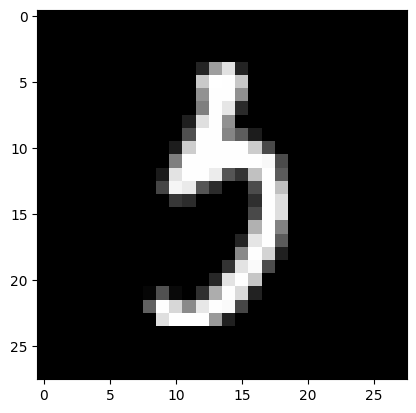

In [34]:
idx = 4740
plt.imshow(test_images[idx])
print(test_labels[idx])

In [35]:
model.predict(test_images[idx].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[6.99888766e-16, 9.41077745e-16, 5.20631688e-22, 3.50198448e-02,
        1.60708793e-21, 9.64980125e-01, 0.00000000e+00, 4.26285673e-09,
        1.01445756e-25, 1.58273047e-10]], dtype=float32)

In [36]:
predicted_digit = np.argmax(model.predict(test_images[idx].reshape(1, 28, 28)))
print(predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5


In [37]:
# 1. Predict on the entire test dataset
test_predictions = model.predict(test_images)

# 2. Convert predictions to digits
predicted_labels = np.argmax(test_predictions, axis=1)

# 3. Compare predictions with actual labels and 4. Find indices of incorrect images
incorrect_indices = np.where(predicted_labels != test_labels)[0]

# Print the indices of incorrectly predicted images
print("Indices of incorrectly predicted test images:")
print(incorrect_indices)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Indices of incorrectly predicted test images:
[ 115  247  274  321  340  381  445  447  449  495  674  684  720  846
  883  895  947  951  956 1014 1039 1050 1107 1156 1226 1232 1242 1247
 1299 1319 1328 1393 1395 1414 1444 1494 1522 1530 1549 1554 1641 1670
 1681 1717 1878 1901 1913 1982 1984 2004 2024 2053 2109 2118 2130 2135
 2291 2293 2369 2387 2422 2462 2488 2597 2607 2654 2742 2863 2921 2927
 2939 2953 3030 3062 3117 3172 3225 3422 3441 3475 3503 3520 3533 3558
 3597 3727 3762 3796 3818 3853 3941 3943 4065 4163 4176 4248 4271 4289
 4306 4425 4437 4487 4497 4536 4731 4740 4807 4814 4860 4880 4966 5457
 5642 5676 5734 5870 5937 5955 5972 5973 5982 6011 6023 6053 6059 6166
 6400 6555 6597 6625 6641 6755 6783 7434 7472 8094 8246 8325 8408 8527
 8584 9009 9015 9019 9280 9308 9587 9634 9664 9679 9698 9700 9729 9745
 9770 9839 9858 9904]


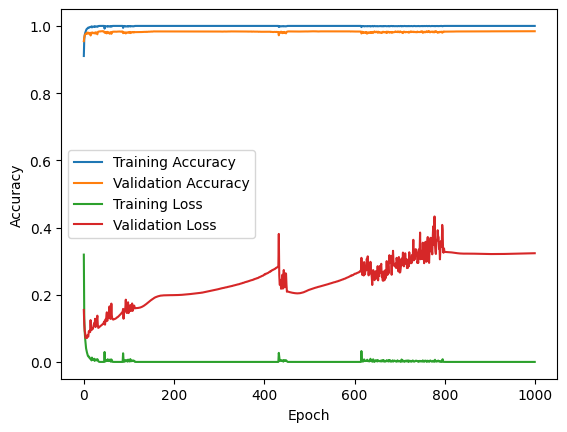

In [38]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()